In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor

df=pd.read_csv('/content/drive/MyDrive/AI ML/AI_ML_Case_Study/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Attribute Information
***Input features in order:***
1) **CRIM**: per capita crime rate by town
2) **ZN:** proportion of residential land zoned for lots over 25,000 sq.ft.
3) **INDUS:** proportion of non-retail business acres per town
4) **CHAS:** Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) **NOX:** nitric oxides concentration (parts per 10 million) [parts/10M]
6) **RM:** average number of rooms per dwelling
7) **AGE:** proportion of owner-occupied units built prior to 1940
8) **DIS:** weighted distances to five Boston employment centres
9) **RAD:** index of accessibility to radial highways
10) **TAX:** full-value property-tax rate per $10,000 [$/10k]
11) **PTRATIO:** pupil-teacher ratio by town
12) **B:** The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town *(This is a controverstial metric)*
13) LSTAT: % lower status of the population


**Output variable:**
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Clean dataset. No missing values. 506 × 14 confirmed.

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


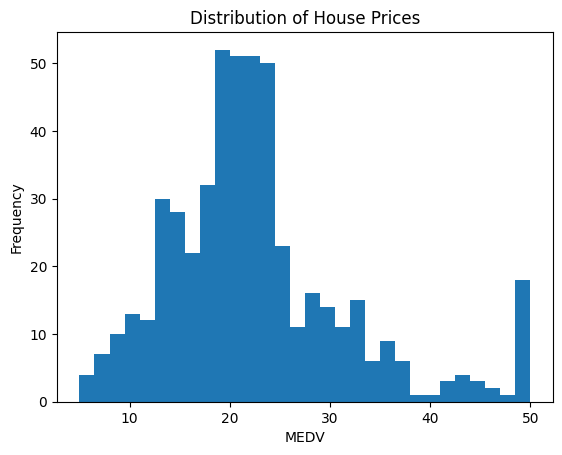

In [ ]:
plt.hist(df["MEDV"], bins=30)
plt.xlabel("MEDV")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()

**Frequency** is the number of data points falling in a range of **MEDV**

Distribution is slightly right-skewed.

There are high-end extreme values.

There is truncation at 50.

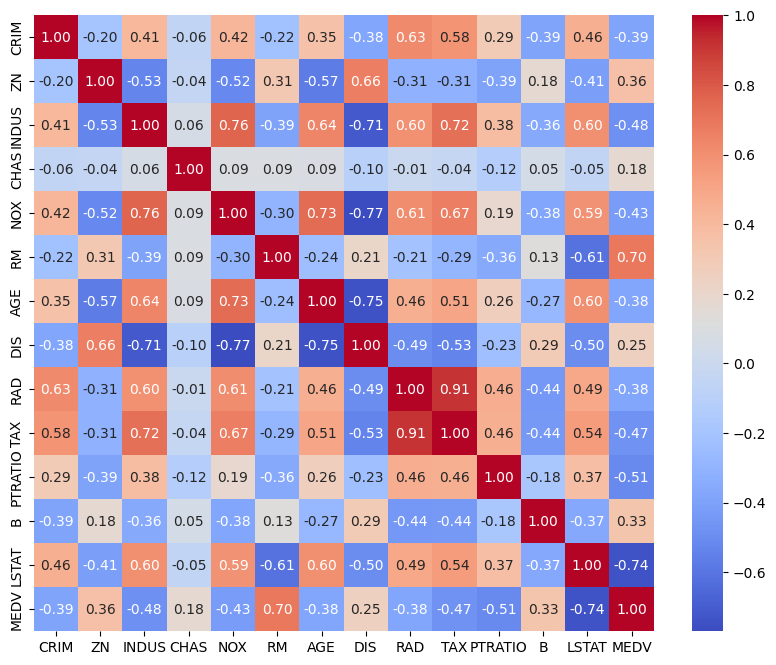

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

**LSTAT → -0.74 (strong negative)**

**RM → +0.70 (strong positive)**

These are your two most powerful predictors.

**More rooms → higher price
Higher % lower-status population → lower price**

**RAD and TAX ≈ 0.91**
That’s extremely high.
That means multicollinearity exists.

In [ ]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]
print(X.shape)
print(y.shape)

(506, 13)
(506,)


**Above is the shape of X and Y**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(404, 13)
(102, 13)


# Train Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluate Model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 24.291119474973513
RMSE: 4.928602182665336
R2 Score: 0.668759493535632


# Train Decision Tree Regressor

In [ ]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree RMSE:", rmse_tree)
print("Decision Tree R2:", r2_tree)

Decision Tree RMSE: 3.2273949915330395
Decision Tree R2: 0.8579634380978161


# Overfitting Test

In [ ]:
print("Train R2:", tree.score(X_train, y_train))
print("Test R2:", tree.score(X_test, y_test))

Train R2: 1.0
Test R2: 0.8579634380978161


**The Decision Tree significantly outperformed Linear Regression** (R²: 0.86 vs 0.67).
However, the **tree achieved R² = 1.0** on training data, indicating overfitting.
Regularization via max_depth or min_samples_split should be applied.

In [ ]:
tree_limited = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_limited.fit(X_train, y_train)

print("Train R2:", tree_limited.score(X_train, y_train))
print("Test R2:", tree_limited.score(X_test, y_test))

Train R2: 0.8882016055749843
Test R2: 0.7306868217984426


# In conclusion

**Linear Regression** *captures linear relationships* but *misses nonlinear interactions*.

**Decision Tree** *captures nonlinearities* and *performs significantly better*.

However, **unrestricted trees** *overfit* (Train R² = 1.0).

Proper hyperparameter tuning is required.

In [ ]:
feature_importance = pd.Series(tree.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False)

,0
RM,0.600326
LSTAT,0.193328
DIS,0.070688
CRIM,0.051296
NOX,0.027148
AGE,0.013617
TAX,0.012464
PTRATIO,0.011012
B,0.009009
INDUS,0.005816


# Earlier we found:

**RM** *strongly positive with MEDV (~0.70)*

**LSTAT** *strongly negative with MEDV (~-0.74)*

# Now tree says:

**RM** *is most important*

**LSTAT** *second most important*

Feature importance analysis shows that RM (average number of rooms) is the most influential predictor, followed by LSTAT (percentage of lower status population). This aligns with correlation analysis, validating model interpretability.

In [ ]:
# Linear Regression (scaled)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linear_model = LinearRegression()
linear_model.fit(X_scaled, y)

# Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, y)

DecisionTreeRegressor(random_state=42)